<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 20** - November 12, 2015

- Laplacian eigenmaps
- MDS, Isomap, LLE

<hr/>

## Numpy's *newaxis*

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
a = np.array([1,2,3])

print repr(a)              # shape: (3,)
print repr(a[newaxis,:])   # shape: (1,3)
print repr(a[:,newaxis])   # shape: (3,1)

# pairwise differences
a[newaxis,:] - a[:,newaxis] # shape: (3,3)

array([1, 2, 3])
array([[1, 2, 3]])
array([[1],
       [2],
       [3]])


array([[ 0,  1,  2],
       [-1,  0,  1],
       [-2, -1,  0]])

<h1><font color="darkblue">Spectral Methods</font></h1>


- Spectral embedding

> Construct the (latent) coordinates based on a given "similarity" graph or matrix
> 

- Spectral clustering

> Use these new coordinates as input to the usual methods <br>
> E.g., simple thresholding, K-means clustering

## Adjacency Matrix

- Are two objects "close"? Are the vertices connected?

> Encode it in an $(n\!\times\!n)$ **matrix** $A$

- The matrix elements

>$ a_{ij} = \left\{ \begin{array}{ll}
         1 & \mbox{if $i$ and $j$ are connected}\\
         0 & \mbox{otherwise}\end{array} \right.  $
         
- Symmetric matrix
         

## Graph Laplacian

- Degree matrix $D$ is diagonal matrix formed from the sum of all edges

>$\displaystyle d_{ii} = \sum_j^n a_{ij} $

- The graph Laplacian

>$ L = D - A$


## Weighted Edges

- Instead of $A$ we can use a weight matrix $W$

>$ L = D - W$ 

> where $D$ has diagonal elements

>$\displaystyle d_{ii} = \sum_j w_{ij}$

- Interesting property

>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n w_{ij}\,(x_i\!-\!x_j)^2 $ 

## Minimization

- Solution: smallest eigenvalues of $L$ and corresponding eigenvectors

> The 1st eigenvector is the trivial solution (constant) <br>
> We use the 2nd eigenvector, and so on...

- Laplacian eigenmaps

> Different similarity matrices to start with<br>
> Different normalizations


## Step by step

/Users/huachenqin/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


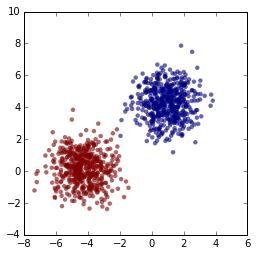

In [3]:
from sklearn import datasets
np.random.seed(3) # try other seeds, e.g., 0

X, C = datasets.make_blobs(n_samples=1000, centers=2)

figure(); subplot(111,aspect='equal'); 
scatter(X[:,0], X[:,1], c=C, alpha=0.6, edgecolor='none');

Symmetric? True


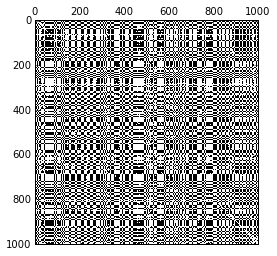

In [4]:
d =  X[newaxis,:,:] - X[:,newaxis,:]
d *= d
d2 = d.sum(axis=2)
A = (d2<9).astype(np.float) # distance threshold 
np.fill_diagonal(A,0)
print 'Symmetric?', np.allclose(A,A.T)
spy(A);

[ -3.09474668e-14   2.51045553e+00]
(2,) (1000, 2)


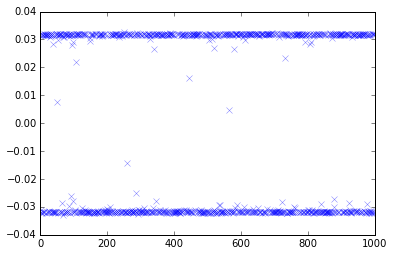

In [5]:
from scipy.linalg import eigh
from scipy.sparse.linalg import eigsh

D = A.sum(axis=0)
D = diag(D)

L = D - A

w, v = eigsh(L, 2, which='SA', tol=1e-2)

print w[0:4]
print w.shape, v.shape
#plot(w)

figure()
plot(v[:,1], 'x', alpha=0.5);

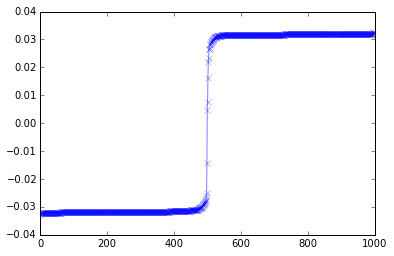

In [6]:
s = argsort(v[:,1])
plot(v[s,1], 'x-', alpha=0.5);

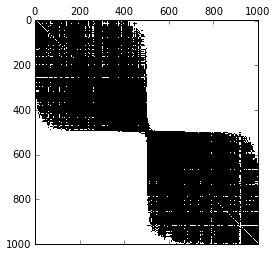

In [7]:
i,j = meshgrid(s,s)
spy(A[i,j]);

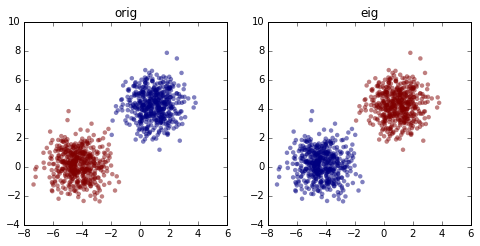

In [8]:
lab = (v[:,1] < 0)

figure(figsize=(8,9)); 
subplot(121,aspect='equal'); 
scatter(X[:,0], X[:,1], c=C, alpha=0.5, edgecolor='none'); title('orig');
subplot(122,aspect='equal'); 
scatter(X[:,0], X[:,1], c=lab, alpha=0.5, edgecolor='none'); title('eig');

## Exercise

- Given the adjacency matrix, determine the number of clusters 

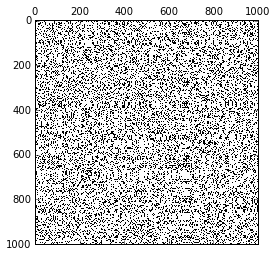

In [9]:
url = 'https://goo.gl/uNxFn2' # save this as the file below
A = np.load('files/Class19-Adj.npy')
spy(A);

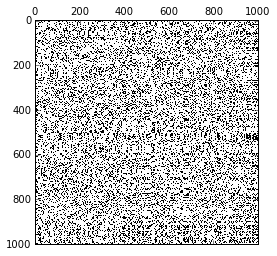

In [10]:
# Actually this code generated the A matrix

n, s = 1000, 450
x = random.permutation(n)
g1, g2 = x[:s], x[s:]
i1,j1 = meshgrid(g1,g1)
i2,j2 = meshgrid(g2,g2)
ix,jx = meshgrid(g2,g1)

p1, p2, px = 0.5, 0.4, 0.1
A = zeros((n,n),dtype=float)
A[i1,j1] = random.rand(s,s) < p1
A[i2,j2] = random.rand(n-s,n-s) < p2
A[ix,jx] = random.rand(s,n-s) < px
A = triu(A,1)
A = A + A.T

#np.save('files/Class19-Adj', A)
         
spy(A);

[ -4.73059092e-15   4.66548392e+01]


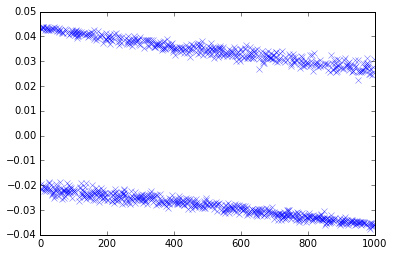

In [20]:
D = A.sum(axis=0)
D = diag(D)

L = D - A

w, v = eigsh(L, 2, which='SA')
print w
plot(v[:,1], 'x', alpha=0.6);

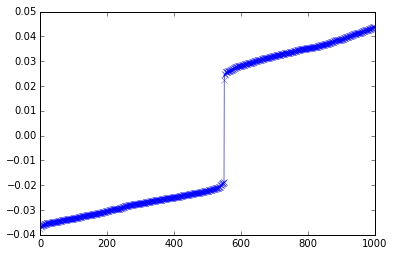

In [12]:
s = argsort(v[:,1])
plot(v[s,1], 'x-', alpha=0.6);

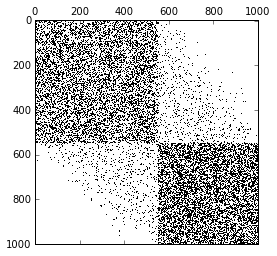

In [13]:
i,j = meshgrid(s,s)
spy(A[i,j]);

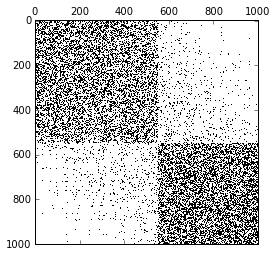

In [14]:
from sklearn.manifold import spectral_embedding

e = spectral_embedding(adjacency=A, n_components=2, 
                       eigen_solver='arpack', 
                       drop_first=False)
l = argsort(e[:,1])
il,jl = meshgrid(l,l)
spy(A[il,jl]);

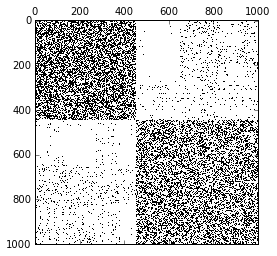

In [15]:
from sklearn.cluster import spectral_clustering

labels = spectral_clustering(affinity=A, n_clusters=2, n_components=2, 
                             eigen_solver='arpack', 
                             assign_labels='discretize')
l = argsort(labels)
il,jl = meshgrid(l,l)
spy(A[il,jl]);

### Example from Matlab code

- Check out the Matlab code and documentation at

> https://www.cs.purdue.edu/homes/dgleich/demos/matlab/spectral/spectral.html

## Complicated Topology

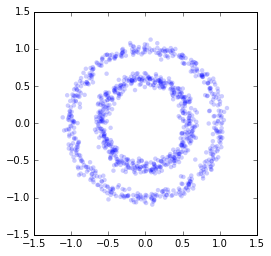

In [16]:
X, _ = datasets.make_circles(n_samples=1000, factor=0.6, noise=0.05)

figure(); subplot(111,aspect='equal'); 
scatter(X[:,0], X[:,1], alpha=0.2, edgecolor='none');

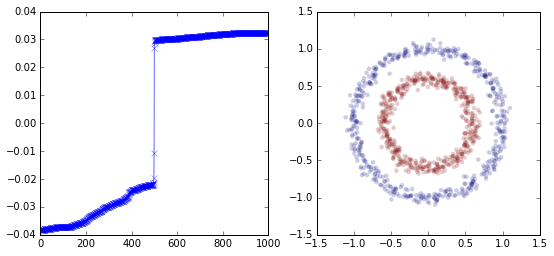

In [17]:
# Weight matrix 
d =  X[newaxis,:,:] - X[:,newaxis,:]
d *= d
d2 = d.sum(axis=2)
W = exp(-d2/.01)
np.fill_diagonal(W,0)

# Laplacian
D = W.sum(axis=0)
D = diag(D)
L = D - W

# eigenproblem
w, v = eigsh(L, 2, which='SM')
lbl = v[:,1] > 0

# plots
figure(figsize=(9,4)); subplot(121);
s = argsort(v[:,1]); plot(v[s,1], 'x-', alpha=0.6);
subplot(122,aspect='equal')
scatter(X[:,0],X[:,1],c=lbl,edgecolor='none',alpha=0.2);

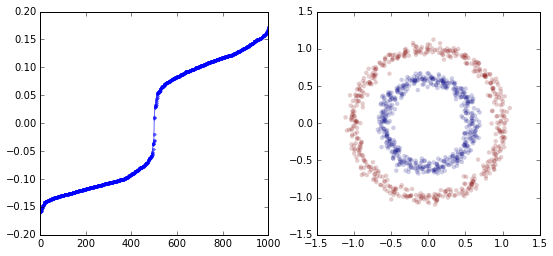

In [18]:
from sklearn.manifold import spectral_embedding

v = spectral_embedding(adjacency=W, n_components=2, eigen_solver='arpack', drop_first=False)
lbl2 = v[:,1] > 0
figure(figsize=(9,4)); subplot(121);
s = argsort(v[:,1]); plot(v[s,1], '.-b', alpha=0.6);
subplot(122,aspect='equal')
scatter(X[:,0],X[:,1],c=lbl2,edgecolor='none',alpha=0.2);

## MDS 

- Metric Multidimensional Scaling

> Find the latent Euclidean coordinates <br>
to match a given distance matrix

- Formally what are the $\{x_k\}$ vectors in $\mathbb{R}^d$ s.t.

>$ d_{ij} = |\!| x_i - x_j |\!| \ \ \ $ for all $i$ and $j$


## Isomap

- Isometric feature mapping

> Use geodesic distance on the neighborhood graph

- Run MDS on that

> Embedding with Euclidean distances approximating the geodesics




### Algorithm

- Neigborhood graph 

> Find $\{x_k\}$ objects within $\epsilon$ distance or $k$ nearest neighbors of all points,
>$\epsilon$-Isomap or $k$-Isomap <br>

> Assign $d_G(i,j)=d_X(i,j)$ distances to edges between neighbors and initialize other elements to $\infty$

- Find shortest paths, e.g., by repeating

>$ d_G(i,j) = \min \Big\{ d_G(i,j),\ \big[d_G(i,k)\!+\!d_G(k,j)\big] \Big\}$

- Low-dimensional embedding

> To approximate the $d_G(i,j)$ for all $i$ and $j$

<img src=http://cnx.org/resources/12c857576a3c98d974030ec4887c4a07faee03e7/isomap.jpg align=left width=600>

## LLE

- Locally-Linear Embedding

> Linear combination of neighbors

- Based on the weights only

> Create lower-dimensional coordinates <br>
with similar linear combinations




<img src=https://www.cs.nyu.edu/~roweis/lle/images/llef2med.gif align=left width=350>